In [95]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

sns.set(color_codes=True)



Importing the two data sets as csv files,
din--> data IN
dinm--> metadata IN

In [96]:
din=pd.read_csv(r"C:\Users\Shashwat Ratna\Desktop\WID\WID_data_IN.csv",sep=";",encoding="utf-8")
dinm=pd.read_csv(r"C:\Users\Shashwat Ratna\Desktop\WID\WID_metadata_IN.csv",sep=";",encoding="cp1252")

Analysis

In [97]:
dinm.head(2)


,country,variable,age,pop,countryname,shortname,simpledes,technicaldes,shorttype,longtype,shortpop,longpop,shortage,longage,unit,source,method
0,IN,acfccoi992,992,i,India,Consumption of fixed capital of corporations,NaN,NaN,Average,Average income or wealth between two percentil...,individuals,The base unit is the individual (rather than t...,Adults,The population is comprised of individuals ove...,INR,See [URL][URL_TEXT]DINA guidelines[/URL_TEXT][...,WID.world estimations as a proportion of GDP b...
1,IN,acfccoi999,999,i,India,Consumption of fixed capital of corporations,NaN,NaN,Average,Average income or wealth between two percentil...,individuals,The base unit is the individual (rather than t...,All Ages,The population is comprised of individuals of ...,INR,See [URL][URL_TEXT]DINA guidelines[/URL_TEXT][...,WID.world estimations as a proportion of GDP b...


In [98]:
din.head()

,country,variable,percentile,year,value,age,pop
0,IN,afiinc992j,p37p100,1951,33916.0,992,j
1,IN,afiinc992j,p37p100,1952,30793.1,992,j
2,IN,afiinc992j,p37p100,1953,36714.7,992,j
3,IN,afiinc992j,p37p100,1954,28677.6,992,j
4,IN,afiinc992j,p37p100,1955,35383.0,992,j


In [99]:
dinm.dtypes

country         object
variable        object
age              int64
pop             object
countryname     object
shortname       object
simpledes       object
technicaldes    object
shorttype       object
longtype        object
shortpop        object
longpop         object
shortage        object
longage         object
unit            object
source          object
method          object
dtype: object

In [100]:
din[din["variable"]=="shweal992j"]

,country,variable,percentile,year,value,age,pop
1038,IN,shweal992j,p55p100,1961,0.8490,992,j
1039,IN,shweal992j,p55p100,1971,0.8537,992,j
1040,IN,shweal992j,p55p100,1981,0.8620,992,j
1041,IN,shweal992j,p55p100,1991,0.8875,992,j
1042,IN,shweal992j,p55p100,1995,0.8933,992,j
...,...,...,...,...,...,...,...
218299,IN,shweal992j,p76p77,2017,0.0084,992,j
218300,IN,shweal992j,p76p77,2018,0.0083,992,j
218301,IN,shweal992j,p76p77,2019,0.0084,992,j
218302,IN,shweal992j,p76p77,2020,0.0084,992,j


USING ahweal992j Data now. Some points to keep in mind,
Country India
Country Code IN
Short name of variable Net personal wealth
Type(s) of variableAverage

Years 1961-2012
Age groups Aggregate on population aged over 20
Population categoriesEqual-split adults
WID.world code ahweal992j
PercentilesAll g-percentiles
Years available for these percentilesPercentiles available for all years
Simple description of variable:                                                                                                       Net personal wealth is the total value of non-financial and financial assets (housing, land, deposits, bonds, equities, etc.) held by households, minus their debts. . The personal or household sector - in the national accounts sense - includes all households and private individuals (including those living in institutions), as well as unincorporated enterprises whose accounts are not separated from those of the households who own them.
Technical description of variable[Net personal wealth]=[Personal non-financial assets]+[Personal financial assets]-[Personal debt]
Method used for computation :
In 1961 and 1971 data covers rural areas only. Net wealth is reported since 1981. In 1971, net wealth is estimated using the liabilies at the bracket level (assuming individuals remain in the same bracket). In 1961, liabilities are estimated assuming the liability/gross wealth ratios at the bracket level from 1971, and using the 1971 proportions of individuals having any kind of liability. In 2002 and 2012 series are corrected using Forbes lists, and the top of the survey distribution is replaced by a Pareto distribution.
Source                                                                                                                                     Nitin Kumar Bharti (2018), Wealth Inequality, Class and Caste in India

In [101]:
cur=din[din["variable"]=="shweal992j"]
l=cur.percentile.unique()
#p0p50 is in l
#p9p100
print("p99p100" in l)

True


Thus we will compare Net personal wealth for the group(bottom 50th to 100th percentile) and the group(top 10th
percentile)

In [102]:
curt=cur.drop(["country","age","pop"],axis=1)
curt=curt[(curt["percentile"]=="p90p100") | (curt["percentile"]=="p0p50") ]
print(curt)

         variable percentile  year   value
43405  shweal992j      p0p50  1961  0.1229
43406  shweal992j      p0p50  1971  0.1175
43407  shweal992j      p0p50  1981  0.1091
43408  shweal992j      p0p50  1991  0.0878
43409  shweal992j      p0p50  1995  0.0839
...           ...        ...   ...     ...
50922  shweal992j    p90p100  2017  0.6392
50923  shweal992j    p90p100  2018  0.6429
50924  shweal992j    p90p100  2019  0.6405
50925  shweal992j    p90p100  2020  0.6394
50926  shweal992j    p90p100  2021  0.6464

[62 rows x 4 columns]


In [103]:
curt=curt.drop("variable",axis=1)
print(curt)


      percentile  year   value
43405      p0p50  1961  0.1229
43406      p0p50  1971  0.1175
43407      p0p50  1981  0.1091
43408      p0p50  1991  0.0878
43409      p0p50  1995  0.0839
...          ...   ...     ...
50922    p90p100  2017  0.6392
50923    p90p100  2018  0.6429
50924    p90p100  2019  0.6405
50925    p90p100  2020  0.6394
50926    p90p100  2021  0.6464

[62 rows x 3 columns]


In [104]:
curt=curt.pivot_table(values="value",columns="percentile",index="year")
print(curt)

percentile   p0p50  p90p100
year                       
1961        0.1229   0.4318
1971        0.1175   0.4225
1981        0.1091   0.4500
1991        0.0878   0.5054
1995        0.0839   0.5442
1996        0.0840   0.5436
1997        0.0837   0.5452
1998        0.0835   0.5461
1999        0.0833   0.5471
2000        0.0831   0.5479
2001        0.0825   0.5512
2002        0.0815   0.5560
2003        0.0834   0.5512
2004        0.0847   0.5486
2005        0.0858   0.5472
2006        0.0859   0.5497
2007        0.0823   0.5683
2008        0.0773   0.5915
2009        0.0767   0.5869
2010        0.0692   0.6144
2011        0.0636   0.6317
2012        0.0639   0.6278
2013        0.0630   0.6306
2014        0.0601   0.6396
2015        0.0599   0.6408
2016        0.0601   0.6396
2017        0.0603   0.6392
2018        0.0596   0.6429
2019        0.0600   0.6405
2020        0.0602   0.6394
2021        0.0590   0.6464


Below picture shows the glaring inequality with respect to net personal wealth

C:\Users\Shashwat Ratna\AppData\Local\Programs\Python\Python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Shashwat Ratna\AppData\Local\Programs\Python\Python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


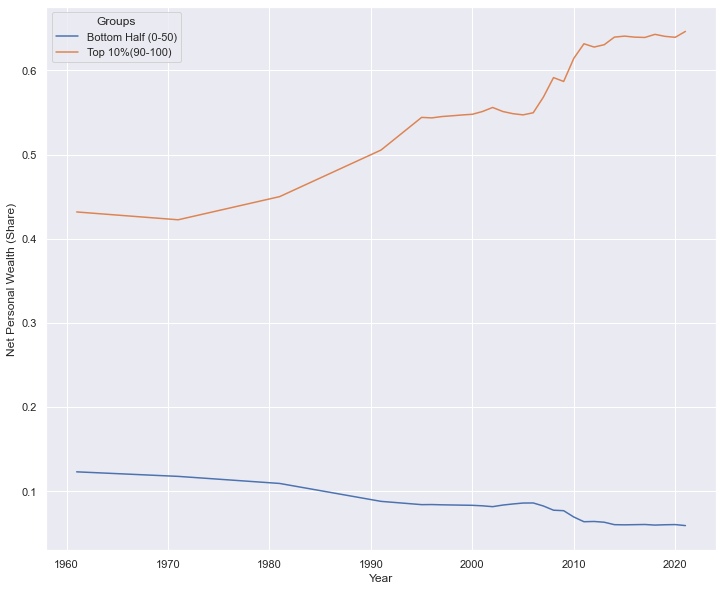

In [108]:
sns.lineplot("year","p0p50",data=curt);
sns.lineplot("year","p90p100",data=curt);
plt.tight_layout;
plt.legend(title="Groups",labels=["Bottom Half (0-50)","Top 10%(90-100)"]);
plt.ylabel("Net Personal Wealth (Share)");
plt.xlabel("Year");
fig=plt.gcf();
fig.set_size_inches(12,10);


C:\Users\Shashwat Ratna\AppData\Local\Programs\Python\Python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


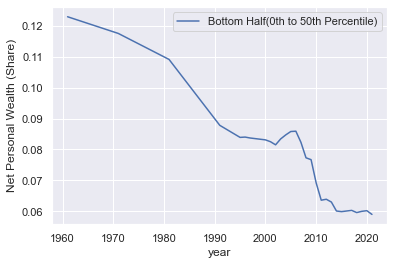

In [106]:
sns.lineplot("year","p0p50",data=curt);
plt.ylabel("Net Personal Wealth (Share)")
plt.legend(labels=["Bottom Half(0th to 50th Percentile)"])

In [107]:
cur[cur["percentile"]=="p99.9p100"]

,country,variable,percentile,year,value,age,pop
109187,IN,shweal992j,p99.9p100,1961,0.0276,992,j
109188,IN,shweal992j,p99.9p100,1971,0.0242,992,j
109189,IN,shweal992j,p99.9p100,1981,0.0269,992,j
109190,IN,shweal992j,p99.9p100,1991,0.0436,992,j
109191,IN,shweal992j,p99.9p100,1995,0.1330,992,j
109192,IN,shweal992j,p99.9p100,1996,0.1326,992,j
109193,IN,shweal992j,p99.9p100,1997,0.1338,992,j
109194,IN,shweal992j,p99.9p100,1998,0.1346,992,j
109195,IN,shweal992j,p99.9p100,1999,0.1354,992,j
109196,IN,shweal992j,p99.9p100,2000,0.1360,992,j
